In [1]:
import pandas as pd

word_freq = pd.read_csv('google-1gram-spanish-freq.tsv', sep='\t', names=['palabra', 'frecuencia'])
word_freq.index = word_freq.index + 1

In [2]:
word_freq.head(10)

# Como es de esperar, palabras funcionales.

palabra  frecuencia
1       de  5111675592
2       la  2957256540
3        y  2049362776
4       en  2011069460
5      que  1980171076
6       el  1972925179
7      los  1277631826
8        a  1240879750
9      del   960774040
10      se   893914677

In [3]:
word_freq.tail(10)

# La data de google-ngram viene ordenada alfab√©ticamente, y la frecuencia m√≠nima
# que recoge es 40 para todos los a√±os. Palabras mal escritas, e.g. zaptistas
# (zapatistas?), zamicnto; algunos nombres (zuburi es apellido). Solo hay dos que
# parecen palabras del espa√±ol: zurr√°ndome y zurci√©ndose; y zabullian efectivamente
# es palabra que se usa en Don Quijote.

palabra  frecuencia
2209933     zizanias          40
2209934   zurr√°ndome          40
2209935       zuburi          40
2209936    zumientos          40
2209937     zamicnto          40
2209938  zurci√©ndose          40
2209939    zaptistas          40
2209940    zuramente          40
2209941     zarparla          40
2209942    zabullian          40

In [4]:
# Cantidad de tipos

len(word_freq)

2209942

In [5]:
# Cantidad de tokens

sum(word_freq[:]['frecuencia'])

69668088661

In [6]:
# Tenemos 2,2 millones de tipos y 69 mil millones de tokens. Sabemos que el final
# de la lista tiene muchas cadenas de caracteres que no son realmente palabras,
# as√≠ que cortemos la lista. El corte es arbitrario, y diferentes expertos eligir√°n
# diferentes puntos de corte, pero la idea es cortar en alg√∫n lugar donde la
# proporci√≥n de palabras/no-palabras ya no sea aceptable.

word_freq.drop(word_freq.index[100000:], inplace=True)
word_freq.tail(20)

palabra  frecuencia
99981     caracterizarla       15219
99982                itu       15219
99983             karate       15219
99984           pardillo       15219
99985         resignarme       15219
99986            strictu       15219
99987               vist       15219
99988          arrastren       15218
99989         muri√©ndose       15218
99990          yahualica       15218
99991   confortablemente       15217
99992             dating       15217
99993          public√≥se       15217
99994              regna       15217
99995              abbot       15216
99996            c√≠stico       15216
99997             expect       15216
99998          gar√≠funas       15216
99999         proteger√°n       15216
100000        recurriera       15216

In [7]:
# Mucho mejor. Hay algunas palabras en ingl√©s, otras que deben ser error
# ortogr√°fico o nombres, pero casi todas son palabras del espa√±ol. Esto
# nos deja con 100,000 tipos, y la siguiente cantidad de tokens.

sum(word_freq[:]['frecuencia'])

# Quedamos con solo mil millones menos (68 mil millones), ya que descartamos
# tipos de baja frecuencia. Pero bajamos los tipos de 2,2 millones a 100,000.

68004557656

In [8]:
# Palabras m√°s frecuentes, ignorando palabras funcionales. Se ignoran tambi√©n
# algunas palabras de clase abierta muy frecuentes, incluidas en la lista de
# de paro de NLTK.

from nltk.corpus import stopwords

sw = stopwords.words('spanish')
word_freq[~word_freq.palabra.isin(sw)].head(20)

palabra  frecuencia
27         √°   149129216
32        si   130264550
36       ser   104335790
41       dos    86119272
44     parte    81981169
50     puede    72848333
51     mismo    72382435
53   general    69931076
56       as√≠    68063059
57      a√±os    68017055
65      s√≥lo    60012351
66      cada    58577259
68      bien    58008566
69      sino    57069512
70    tiempo    56744995
71         i    56655888
75      vida    54951501
76  gobierno    54803833
77  nacional    52840474
78       vez    52806022

La conjunci√≥n "y" escrita como "i" se usaba al menos hasta fines del
siglo XIX, por ejemplo en la Historia General de Chile de Barros
Arana publicada entre 1884-1902. La preposici√≥n "a" con acento no
tengo idea, veamos Google Ngrams.

![alt text](google_ngrams_preposicion_a.png "Title")

Alrededor de 1907-08 empez√≥ el cambio de ortograf√≠a, proceso que dur√≥
hasta 1922-23.

In [9]:
# Vamos a sumar la frecuencia de "i" a "y", y de "√°" a "a", que suena muy
# confuso. Luego borraremos "√°" e "i", y re-ordenaremos y re-indexaremos
# los datos. De esta manera tendremos una idea m√°s precisa del uso de
# estas palabras independientemente de su ortograf√≠a. Tambi√©n borramos
# un NaN que hay por ah√≠.

word_freq.loc[8, 'frecuencia'] = sum(word_freq[word_freq.palabra.isin(['a', '√°'])]['frecuencia'])
word_freq.loc[3, 'frecuencia'] = sum(word_freq[word_freq.palabra.isin(['y', 'i'])]['frecuencia'])
word_freq.drop([27, 71], inplace=True)
word_freq.drop(word_freq[pd.isnull(word_freq).any(axis=1)].index, inplace=True)
word_freq.sort_values(by=['frecuencia'], ascending=False, inplace=True)
word_freq.reset_index(drop=True, inplace=True)
word_freq.index = word_freq.index + 1

In [10]:
# Veamos la proporci√≥n de la frecuencia de las palabras (o tipos) y el
# n√∫mero total de tokens.

word_freq['%'] = word_freq['frecuencia'].transform(lambda r: round(r/r.sum(),4)*100)
word_freq.head(10)

# 1 de cada diez palabras es "de" o "la", y una de cada 5 palabras es 
# "de", "la", "y", "en" o "que".

palabra  frecuencia     %
1       de  5111675592  7.52
2       la  2957256540  4.35
3        y  2106018664  3.10
4       en  2011069460  2.96
5      que  1980171076  2.91
6       el  1972925179  2.90
7        a  1390008966  2.04
8      los  1277631826  1.88
9      del   960774040  1.41
10      se   893914677  1.31

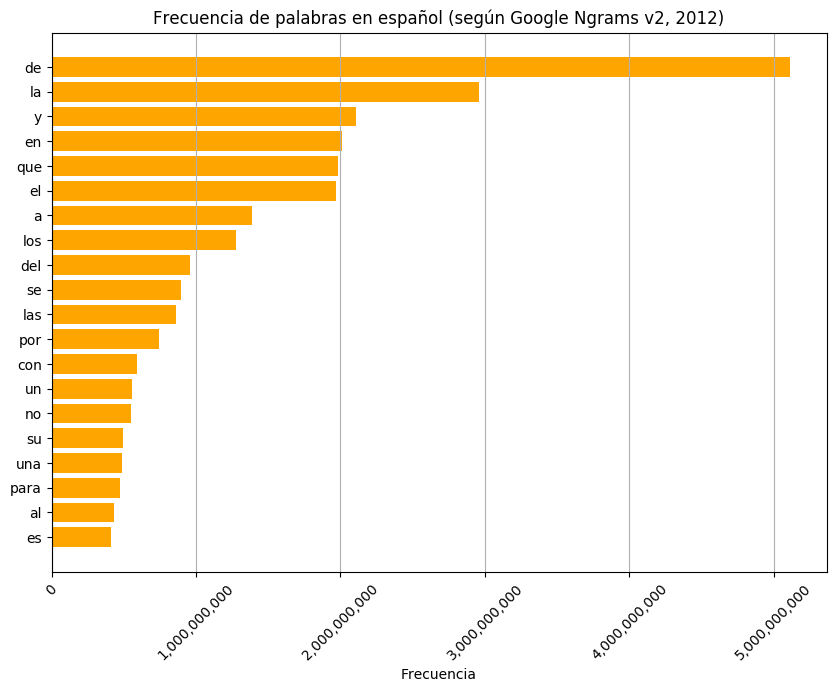

In [11]:
# Grafiquemos la frecuencia de las palabras.

%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

plt.rcdefaults()
plt.rcParams["figure.figsize"] = [10, 7]

fig, ax = plt.subplots()
plt.xticks(rotation=45)

top_n = 20
top_words = word_freq['palabra'][:top_n].tolist()
y_pos = np.arange(len(top_words))
top_freqs = np.array(word_freq['frecuencia'][:top_n].tolist())

ax.barh(y_pos, top_freqs, 0.8, align='center', color='orange', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(top_words)
ax.invert_yaxis()
ax.set_xlabel('Frecuencia')
ax.set_title('Frecuencia de palabras en espa√±ol (seg√∫n Google Ngrams v2, 2012)')
ax.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='x')
plt.show()

# Se parece, m√°s o menos, a una distribuci√≥n de Zipf.
# TODO: graficar Zipf encima.
# freq("la") = 0.5 * freq("de"), freq("y") = 0.33 * freq("de"), etc.
# TODO: mostrar la frecuencia exacta al lado de la barra y deshacerse
# del grid de fondo.

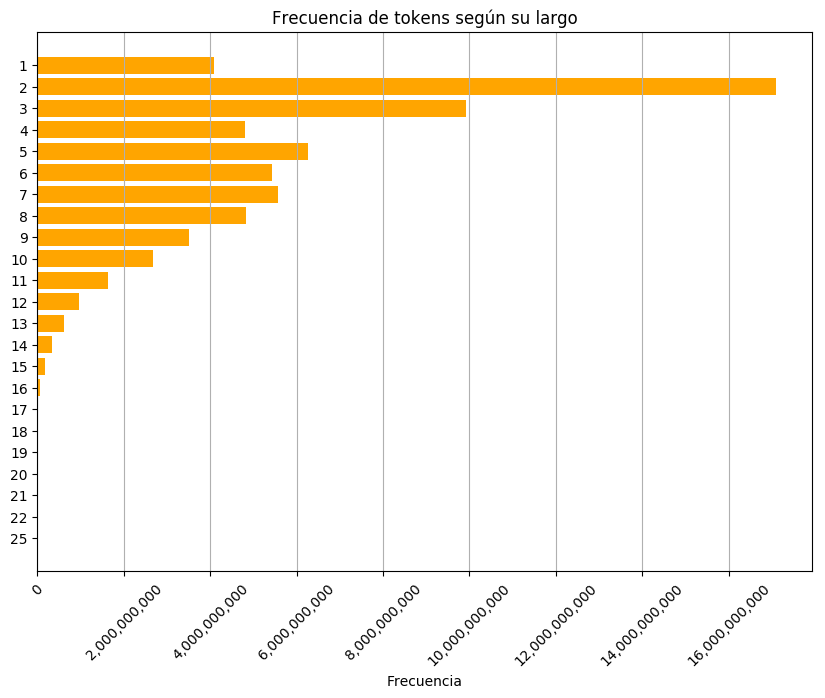

In [12]:
# Veamos el largo de los tokens

from collections import defaultdict

word_length_freqs = defaultdict(int)
word_length_types = defaultdict(list)

for _i, row in word_freq.iterrows():
    word_length_freqs[len(row['palabra'])] += row['frecuencia']
    word_length_types[len(row['palabra'])].append(row['palabra'])

plt.rcdefaults()
plt.rcParams["figure.figsize"] = [10, 7]

fig, ax = plt.subplots()
plt.xticks(rotation=45)

lengths, length_freqs = zip(*sorted(word_length_freqs.items(), key=lambda x: x[0]))
y_pos = np.arange(len(lengths))

ax.barh(y_pos, length_freqs, 0.8, align='center', color='orange', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(lengths)
ax.invert_yaxis()
ax.set_xlabel('Frecuencia')
ax.set_title('Frecuencia de tokens seg√∫n su largo')
ax.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='x')
plt.show()

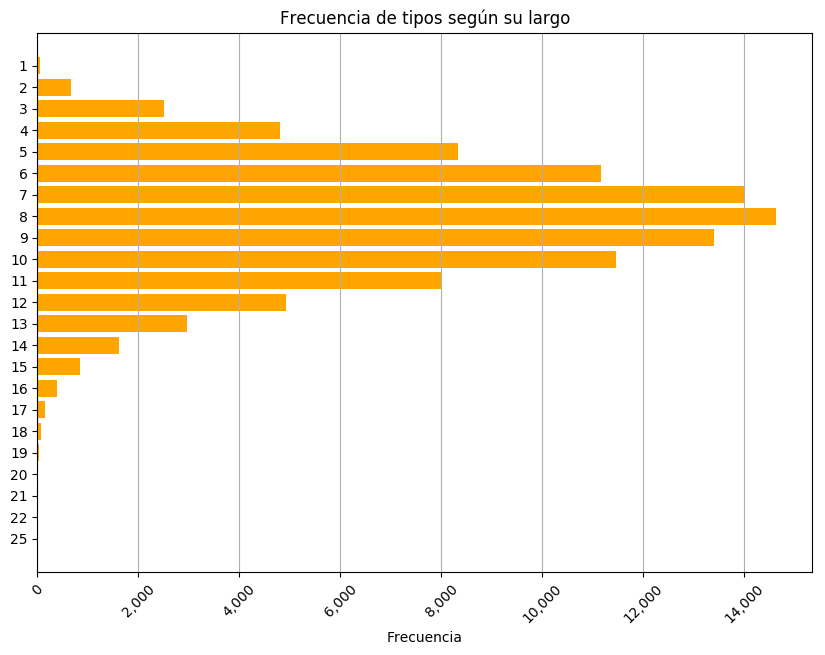

In [13]:
# ... y el largo de los tipos

plt.rcdefaults()
plt.rcParams["figure.figsize"] = [10, 7]

fig, ax = plt.subplots()
plt.xticks(rotation=45)

lengths, length_types = zip(*sorted(word_length_types.items(), key=lambda x: x[0]))
length_num_types = [len(ts) for ts in length_types]
y_pos = np.arange(len(lengths))

ax.barh(y_pos, length_num_types, 0.8, align='center', color='orange', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(lengths)
ax.invert_yaxis()
ax.set_xlabel('Frecuencia')
ax.set_title('Frecuencia de tipos seg√∫n su largo')
ax.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='x')
plt.show()

In [14]:
# ¬øCu√°les son esas palabras m√°s largas?

from IPython.display import HTML, display

inner_table = ""
for i in (20, 21, 22, 25):
    inner_table += '<tr><td align="center">{}</td><td align="center">{}</td></tr>'.format(
        i, ', '.join(word_length_types[i]))

display(HTML(
    """<table>
         <tr>
           <td align="center"><b>largo</b></td>
           <td align="left"><b>palabras</b></td>
         </tr>{}
       </table>""".format(inner_table)
))

# "contencioso administrativo" es un t√©rmino legal que frecuentemente se une con un gui√≥n.
# ¬øQuiz√°s el gui√≥n sea mal interpretado cuando coincide con gui√≥n para salto de p√°gina?

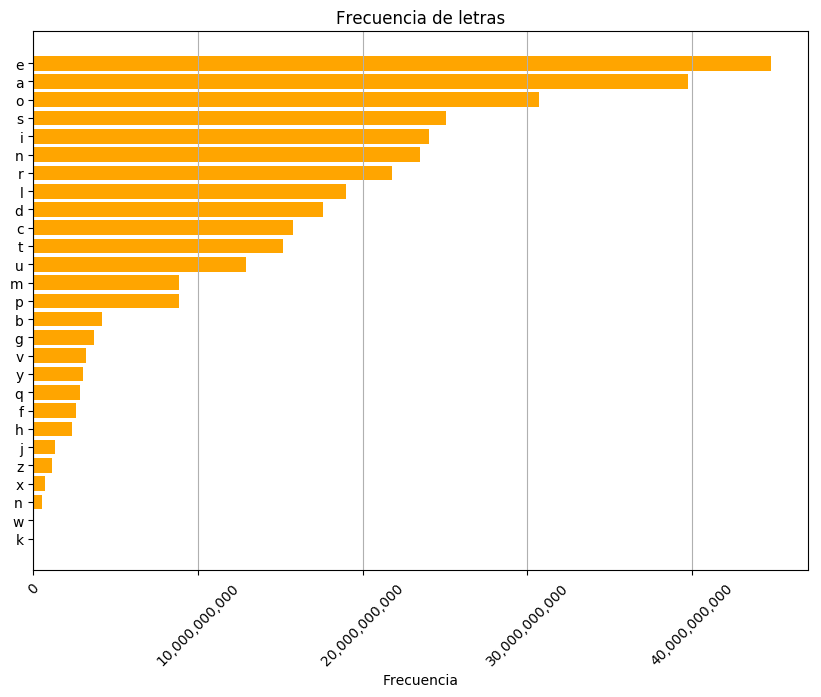

In [15]:
# Frecuencia de letras

characters = 'qwertyuiopasdfghjkl√±zxcvbnm√°√©√≠√≥√∫√º'
diacritics = '√°√©√≠√≥√∫√º'
diac2base = {'√°': 'a', '√©': 'e', '√≠': 'i', '√≥': 'o', '√∫': 'u', '√º': 'u'}

freq_chars_base = defaultdict(int)

for _i, row in word_freq.iterrows():
    for char in row['palabra']:
        if char in characters:
            if char in diacritics:
                freq_chars_base[diac2base[char]] += row['frecuencia']
            else:
                freq_chars_base[char] += row['frecuencia']
                
plt.rcdefaults()
plt.rcParams["figure.figsize"] = [10, 7]

fig, ax = plt.subplots()
plt.xticks(rotation=45)

chars, char_freqs = zip(*sorted(freq_chars_base.items(), key=lambda x: x[1], reverse=True))
y_pos = np.arange(len(chars))

ax.barh(y_pos, char_freqs, 0.8, align='center', color='orange', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(chars)
ax.invert_yaxis()
ax.set_xlabel('Frecuencia')
ax.set_title('Frecuencia de letras')
ax.ticklabel_format(style='plain', axis='x', scilimits=(0,0))
ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='x')
plt.show()

# Muy bien, ah√≠ est√°n las frecuencias de las letras colapsando los diacr√≠ticos a
# su letra base. Pero, ¬øcu√°l es el ETAOIN SRHLDCU para el espa√±ol? No encontr√©
# informaci√≥n sobre el orden de los tipos m√≥viles en sus cajas. üê¨ ay√∫dameeee.